In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
def computeLoss(X1,X2,X3,Y):
    loss=0
    n=len(X1)
    for i in range(n):
        loss+=((a*X1[i]+b*X2[i]+c*X3[i]+d)*r+ (e*X1[i]+f*X2[i]+\
                                              g*X3[i]+h)*j+k- Y[i])**2/n/2
    return loss

In [5]:

def computeGrad(X1,X2,X3,Y,i,doer):
    togtmol=2*((a*X1[i]+b*X2[i]+c*X3[i]+d)*r+ (e*X1[i]+f*X2[i]+\
                                              g*X3[i]+h)*j+k- Y[i])
    grad=0
    if(doer=="a"):
        grad=togtmol*X1[i]*r
    if(doer=="b"):
        grad=togtmol*X2[i]*r
    if(doer=="c"):
        grad=togtmol*X3[i]*r
    if(doer=="d"):
        grad=togtmol*r
    if(doer=="r"):
        grad=togtmol*(a*X1[i]+b*X2[i]+c*X3[i]+d)
    if(doer=="e"):
        grad=togtmol*X1[i]*j
    if(doer=="f"):
        grad=togtmol*X2[i]*j
    if(doer=="g"):
        grad=togtmol*X3[i]*j
    if(doer=="h"):
        grad=togtmol*j
    if(doer=="j"):
        grad=togtmol*(e*X1[i]+f*X2[i]+g*X3[i]+h)
    if(doer=="k"):
        grad=togtmol
    
    return grad

In [6]:
epoch=1000
learning_rate=0.000001

In [7]:
a= np.random.random_sample()
b= np.random.random_sample()
c= np.random.random_sample()
d= np.random.random_sample()
e= np.random.random_sample()
f= np.random.random_sample()
g= np.random.random_sample()
h= np.random.random_sample()
j= np.random.random_sample()
k= np.random.random_sample()
r= np.random.random_sample()

In [8]:
for i in range(epoch):
    print("epoch #", i)
    print("loss: ",computeLoss(data['GRE Score'],data['University Rating']\
                               ,data['CGPA'],data['Chance of Admit ']))
    which=i%len(data)
    (eh,dun,su,hariu)=\
    (data['GRE Score'],data['University Rating'],data['CGPA'],data['Chance of Admit '])
    a-=learning_rate* computeGrad(eh,dun,su,hariu,which,"a")
    b-=learning_rate* computeGrad(eh,dun,su,hariu,which,"b")
    c-=learning_rate* computeGrad(eh,dun,su,hariu,which,"c")
    d-=learning_rate* computeGrad(eh,dun,su,hariu,which,"d")
    e-=learning_rate* computeGrad(eh,dun,su,hariu,which,"e")
    f-=learning_rate* computeGrad(eh,dun,su,hariu,which,"f")
    g-=learning_rate* computeGrad(eh,dun,su,hariu,which,"g")
    h-=learning_rate* computeGrad(eh,dun,su,hariu,which,"h")
    r-=learning_rate* computeGrad(eh,dun,su,hariu,which,"r")
    j-=learning_rate* computeGrad(eh,dun,su,hariu,which,"j")
    k-=learning_rate* computeGrad(eh,dun,su,hariu,which,"k")
    print("a: "+str(a)+" b: "+str(b)+" c: "+str(c)+" d: "+str(d),end=" ")
    print("e: "+str(e)+" f: "+str(f)+" g: "+str(g)+" h: "+str(h))
    print(" r: "+str(r), " j: "+str(j), " k: "+str(k))
    print("--------------------------")


epoch # 0
loss:  3282.4340419155546
a: 0.5857237649614111 b: 0.3134654289768383 c: 0.6521007988745137 d: 0.025323597855611998 e: 0.017981696499077986 f: 0.7263071197195953 g: 0.8898599033971556 h: 0.514805518998663
 r: 0.3586337235085658  j: 0.1721175321198788  k: 0.12422130388409369
--------------------------
epoch # 1
loss:  2525.2317195967
a: 0.5687806025311462 b: 0.3132619026136689 c: 0.6516494810217184 d: 0.0252727175040027 e: 0.010070011503779432 f: 0.7262100521072797 g: 0.8896446561708966 h: 0.5147812522317092
 r: 0.3316563171434684  j: 0.170213282975324  k: 0.12409069377837924
--------------------------
epoch # 2
loss:  2025.392609519094
a: 0.5555177714311149 b: 0.3131387556534612 c: 0.6513210897780232 d: 0.025231669176487906 e: 0.003412872454618421 f: 0.7261472171099131 g: 0.8894770962653027 h: 0.5147603073211843
 r: 0.3092956388297189  j: 0.16896204670124293  k: 0.12397579676828673
--------------------------
epoch # 3
loss:  1670.2384626974779
a: 0.5438377941099583 b: 0.31303

loss:  46.17419952053153
a: 0.4666561221369855 b: 0.3122895906153502 c: 0.648972792773054 d: 0.024955914992603048 e: -0.07181881599295335 f: 0.7254051122524989 g: 0.8874761416841878 h: 0.5145254386404259
 r: 0.07675135752668012  j: 0.1704177395496131  k: 0.12264914851065098
--------------------------
epoch # 31
loss:  41.80753780826171
a: 0.46618963031560423 b: 0.31228531626543865 c: 0.648960967072886 d: 0.02495449021060667 e: -0.07285330266796418 f: 0.7253956804949452 g: 0.8874500471685968 h: 0.514522294735465
 r: 0.07382192339761529  j: 0.1706588992178071  k: 0.12263163726819355
--------------------------
epoch # 32
loss:  37.17073025024044
a: 0.4657308389587685 b: 0.3122798935426408 c: 0.6489482236765333 d: 0.024953134531449234 e: -0.07391259834113974 f: 0.7253832278737 g: 0.8874207835359439 h: 0.5145191815990781
 r: 0.07081582478073704  j: 0.1708870390627158  k: 0.12261439219690226
--------------------------
epoch # 33
loss:  32.708427207312866
a: 0.4653042449339421 b: 0.3122736273

loss:  2.215889004767422
a: 0.4618328654726021 b: 0.31223774975196916 c: 0.6488424243339899 d: 0.024940941840671253 e: -0.08626614326707775 f: 0.7252515812830144 g: 0.8870894225430861 h: 0.5144807394759178
 r: 0.036300179081663914  j: 0.17407736299170068  k: 0.12240210495206091
--------------------------
epoch # 58
loss:  2.011052847883429
a: 0.46179529537728137 b: 0.31223762454802184 c: 0.6488415729471503 d: 0.024940816636739506 e: -0.08644626775214931 f: 0.7252509841430438 g: 0.887085361991532 h: 0.5144801423376568
 r: 0.03580865810126842  j: 0.17413875052463007  k: 0.12239881779757936
--------------------------
epoch # 59
loss:  1.841630279613936
a: 0.4617506620283287 b: 0.3122373375880349 c: 0.6488403820632168 d: 0.02494067315677287 e: -0.08666326740167761 f: 0.7252495968328775 g: 0.8870796046557384 h: 0.5144794486856401
 r: 0.035212595717402845  j: 0.1742058108398375  k: 0.12239501522081732
--------------------------
epoch # 60
loss:  1.6466153400166759
a: 0.4617114157238019 b: 0.

loss:  0.10374959933841509
a: 0.46122615371748577 b: 0.31223207382431634 c: 0.6488259595319823 d: 0.024939026361755053 e: -0.08957954692289426 f: 0.7252201733846082 g: 0.8869998080571084 h: 0.5144703548926642
 r: 0.027203445506223722  j: 0.17507207914944226  k: 0.12234543428920579
--------------------------
epoch # 85
loss:  0.09043795925081237
a: 0.4612176108253912 b: 0.312231966719546 c: 0.64882572765016 d: 0.024938999585566078 e: -0.08963451776909057 f: 0.725219488394787 g: 0.8869983250556002 h: 0.5144701836461641
 r: 0.027052789984906744  j: 0.17508838148907904  k: 0.12234450311945327
--------------------------
epoch # 86
loss:  0.08008557656763067
a: 0.46121178984908195 b: 0.312231911289728 c: 0.6488255720771394 d: 0.024938981108962234 e: -0.0896721862379566 f: 0.7252191318299653 g: 0.886997324297553 h: 0.5144700647918058
 r: 0.026949807864225947  j: 0.17510009495479864  k: 0.12234385596441923
--------------------------
epoch # 87
loss:  0.07340517663000436
a: 0.46120807462371455 

loss:  0.009444963576558926
a: 0.4611110171998655 b: 0.31223081716783135 c: 0.648822872272387 d: 0.024938656690431778 e: -0.09034913150750377 f: 0.7252117988058138 g: 0.8869792852179511 h: 0.5144678985390442
 r: 0.025098389611099014  j: 0.17530805635204671  k: 0.12233205396649255
--------------------------
epoch # 112
loss:  0.009010387193691837
a: 0.4611088006833682 b: 0.31223079507882645 c: 0.648822810864954 d: 0.024938649327430864 e: -0.09036461173602194 f: 0.725211645377031 g: 0.8869788586861709 h: 0.5144678473963635
 r: 0.02505604012166651  j: 0.17531283810911638  k: 0.12233177469527315
--------------------------
epoch # 113
loss:  0.0087712176062888
a: 0.46111103002782033 b: 0.3122308090104378 c: 0.6488228704922502 d: 0.02493865629323586 e: -0.0903490154003039 f: 0.7252117422405651 g: 0.8869792732619948 h: 0.5144678958279005
 r: 0.02509851719996112  j: 0.17530774416087802  k: 0.12233203769341204
--------------------------
epoch # 114
loss:  0.009011490927899077
a: 0.4611086419956

loss:  0.011442513574922115
a: 0.4610817682070057 b: 0.31223033716750426 c: 0.6488220455681757 d: 0.024938560958767397 e: -0.09055523295833574 f: 0.72520842533758 g: 0.8869734918441438 h: 0.5144672277599087
 r: 0.024531969109997952  j: 0.1753659073859619  k: 0.12232839812181848
--------------------------
epoch # 138
loss:  0.010365832487028173
a: 0.46108576382048144 b: 0.31223036167733476 c: 0.6488221568428055 d: 0.02493857321368136 e: -0.09052667411437283 f: 0.72520859939994 g: 0.8869742820870634 h: 0.5144673147906259
 r: 0.024609813049141133  j: 0.17535670937292563  k: 0.12232886962353398
--------------------------
epoch # 139
loss:  0.00959467808287376
a: 0.4610905771769795 b: 0.3122303768118219 c: 0.6488222948693281 d: 0.024938588348166955 e: -0.09049238084771906 f: 0.7252087065697282 g: 0.8869752594754725 h: 0.5144674219598594
 r: 0.024703246391294  j: 0.17534537951159979  k: 0.12232945176429753
--------------------------
epoch # 140
loss:  0.008915420083617471
a: 0.46109480820194

loss:  0.009131285128051425
a: 0.46110756538940756 b: 0.312230345379747 c: 0.648822737196415 d: 0.024938642572210578 e: -0.09037220707685119 f: 0.7252084969071709 g: 0.886978372046891 h: 0.5144678030840295
 r: 0.025028563101837552  j: 0.17530185458016112  k: 0.12233152617848846
--------------------------
epoch # 166
loss:  0.0086533536212979
a: 0.461106062689971 b: 0.3122303304539748 c: 0.6488226957525215 d: 0.024938637596953684 e: -0.09038273088799799 f: 0.7252083929520096 g: 0.8869780833982193 h: 0.514467768432476
 r: 0.024999778630748804  j: 0.17530511348811323  k: 0.12233133700600425
--------------------------
epoch # 167
loss:  0.008544632853084405
a: 0.46110533033497975 b: 0.3122303234354575 c: 0.648822676404809 d: 0.024938635257448136 e: -0.0903878657270779 f: 0.7252083440326541 g: 0.8869779485439372 h: 0.5144677521261017
 r: 0.02498576529196511  j: 0.17530673541382572  k: 0.1223312482704697
--------------------------
epoch # 168
loss:  0.008500911296704232
a: 0.4611065716259972

loss:  0.00836694453309219
a: 0.46109725679425156 b: 0.3122300981625975 c: 0.6488224286657983 d: 0.024938612932810172 e: -0.09044448014022036 f: 0.7252067758182436 g: 0.8869762244152183 h: 0.5144675967581237
 r: 0.02482880400045965  j: 0.1753191968553508  k: 0.12233041693326889
--------------------------
epoch # 193
loss:  0.008422096383330413
a: 0.46109555568286253 b: 0.3122300728519635 c: 0.6488223804237314 d: 0.024938607870684096 e: -0.09045649022039562 f: 0.7252065983371621 g: 0.8869758861367968 h: 0.5144675612621601
 r: 0.024795863493528338  j: 0.17532260993589804  k: 0.12233022530867603
--------------------------
epoch # 194
loss:  0.00850124318837332
a: 0.4610963012177944 b: 0.31223007992895774 c: 0.6488224010885542 d: 0.02493861022968191 e: -0.09045121945955346 f: 0.7252066480688547 g: 0.8869760313532589 h: 0.5144675778393036
 r: 0.024810268689592876  j: 0.17532097595065893  k: 0.12233031541236124
--------------------------
epoch # 195
loss:  0.008462469401949538
a: 0.461099216

loss:  0.008456242585423688
a: 0.4610961266358304 b: 0.31222996658569824 c: 0.6488223637725825 d: 0.0249386124239773 e: -0.09045225981889901 f: 0.7252058582068474 g: 0.8869757778257477 h: 0.5144675940067441
 r: 0.02480540432413796  j: 0.17531695274461104  k: 0.12233041477058254
--------------------------
epoch # 219
loss:  0.008472498835571919
a: 0.4610970002744685 b: 0.31222997498506344 c: 0.6488223873468006 d: 0.02493861522376543 e: -0.09044608595055025 f: 0.7252059172157349 g: 0.8869759434439338 h: 0.5144676136762767
 r: 0.02482226563941197  j: 0.17531501796718443  k: 0.1223305218267441
--------------------------
epoch # 220
loss:  0.008433058889610092
a: 0.46109733139351067 b: 0.31222997815834524 c: 0.6488223966022058 d: 0.024938616281525917 e: -0.09044374760129138 f: 0.7252059394930562 g: 0.8869760084194185 h: 0.5144676211020114
 r: 0.024828659876816664  j: 0.17531429605008028  k: 0.12233056222690421
--------------------------
epoch # 221
loss:  0.00842039617529626
a: 0.4610982105

loss:  0.008555407736259766
a: 0.46110730735909056 b: 0.3122299319668462 c: 0.6488226446552581 d: 0.024938651339947073 e: -0.09037337945798564 f: 0.7252056188383053 g: 0.8869777505610004 h: 0.5144678671510684
 r: 0.025018765466541804  j: 0.17528743616376177  k: 0.12233191386370683
--------------------------
epoch # 249
loss:  0.00862118450864171
a: 0.46110759297355314 b: 0.3122299346357959 c: 0.6488226525108667 d: 0.024938652229596882 e: -0.09037137863331036 f: 0.7252056374191972 g: 0.8869778052507286 h: 0.5144678733446659
 r: 0.025024231849829225  j: 0.17528681420955106  k: 0.12233194748329097
--------------------------
epoch # 250
loss:  0.008643466743210367
a: 0.4611080278391176 b: 0.3122299387121377 c: 0.6488226641556163 d: 0.02493865358837735 e: -0.09036833292880997 f: 0.7252056657930019 g: 0.886977886305186 h: 0.514467882802553
 r: 0.02503254530490327  j: 0.17528585691012247  k: 0.12233199884244468
--------------------------
epoch # 251
loss:  0.008679124935363235
a: 0.4611084958

loss:  0.009064733268274951
a: 0.4611133552841484 b: 0.31222984419747246 c: 0.6488227800953263 d: 0.024938672107263013 e: -0.09033088856975828 f: 0.7252050113541528 g: 0.8869786987831598 h: 0.514468012254841
 r: 0.02513242050617622  j: 0.17526911534361247  k: 0.1223327100437711
--------------------------
epoch # 278
loss:  0.009279395793606227
a: 0.4611137517560831 b: 0.312229846771657 c: 0.6488227910227398 d: 0.024938673394355168 e: -0.09032812397528105 f: 0.7252050292014358 g: 0.8869787745448575 h: 0.5144680211784407
 r: 0.025139964946133346  j: 0.17526822328688932  k: 0.12233275868889193
--------------------------
epoch # 279
loss:  0.009337004767375503
a: 0.4611133870614011 b: 0.3122298443726302 c: 0.6488227805509876 d: 0.02493867219484187 e: -0.09033066621890201 f: 0.7252050125711125 g: 0.8869787019535137 h: 0.51446801286332
 r: 0.0251330150306125  j: 0.17526902934950217  k: 0.12233271331146855
--------------------------
epoch # 280
loss:  0.009283893148343676
a: 0.461111784988611

loss:  0.009428804150505222
a: 0.46111401164590565 b: 0.31222975607666603 c: 0.6488227757319236 d: 0.024938675005780585 e: -0.09032616994303112 f: 0.725204399457154 g: 0.8869786722964432 h: 0.5144680328959775
 r: 0.02514363324619646  j: 0.17526424616577613  k: 0.12233282619868838
--------------------------
epoch # 307
loss:  0.0093696728251749
a: 0.4611120196715322 b: 0.3122297315633326 c: 0.6488227205769246 d: 0.024938668877447983 e: -0.09034005318791011 f: 0.7252042296952421 g: 0.886978290332517 h: 0.5144679904557524
 r: 0.02510562184344142  j: 0.17526838140873652  k: 0.12233259613098527
--------------------------
epoch # 308
loss:  0.009092617522010278
a: 0.4611110058982422 b: 0.31222972181670866 c: 0.6488226928640242 d: 0.02493866562857367 e: -0.0903471297137479 f: 0.725204162058667 g: 0.8869780980192947 h: 0.5144679679103407
 r: 0.02508628013909101  j: 0.175270583801931  k: 0.12233247339287272
--------------------------
epoch # 309
loss:  0.008968609082520071
a: 0.4611076772784506

loss:  0.009419125826730977
a: 0.46111397081417027 b: 0.312229677984565 c: 0.6488227564544287 d: 0.024938675234800044 e: -0.09032627168006224 f: 0.7252038580774962 g: 0.8869785433881692 h: 0.5144680351074883
 r: 0.025141946668181054  j: 0.17526150535018906  k: 0.12233284018257666
--------------------------
epoch # 334
loss:  0.009359766007744031
a: 0.46111104287288196 b: 0.3122296404514758 c: 0.6488226752891249 d: 0.02493866585152882 e: -0.09034667949466589 f: 0.7252035980034864 g: 0.8869779809786759 h: 0.5144679700893486
 r: 0.02508602071226544  j: 0.1752675609161884  k: 0.12233248627382874
--------------------------
epoch # 335
loss:  0.008969677951846508
a: 0.46110940452258437 b: 0.3122296202898451 c: 0.6488226293710119 d: 0.024938660811121775 e: -0.09035812457213212 f: 0.7252034580550977 g: 0.8869776622465336 h: 0.5144679351024642
 r: 0.02505467137718821  j: 0.1752709523061702  k: 0.12233229662172761
--------------------------
epoch # 336
loss:  0.008793029509426297
a: 0.4611087547

loss:  0.011162351783580878
a: 0.4611203153055825 b: 0.31222954505361694 c: 0.6488228676573777 d: 0.024938697855175652 e: -0.09028178370565379 f: 0.7252029361163229 g: 0.8869793213918695 h: 0.5144681929076035
 r: 0.025259720545347385  j: 0.17524010409606525  k: 0.12233370957551809
--------------------------
epoch # 363
loss:  0.010510298146863047
a: 0.46112104959056516 b: 0.31222954985229173 c: 0.6488228877158383 d: 0.02493870025451282 e: -0.09027669018972156 f: 0.725202969215822 g: 0.8869794597477417 h: 0.5144682094572779
 r: 0.025273619901601548  j: 0.1752384557167021  k: 0.12233379986403846
--------------------------
epoch # 364
loss:  0.010673270668298363
a: 0.46111988737551224 b: 0.3122295387142445 c: 0.6488228546729652 d: 0.02493869654183083 e: -0.09028474757361396 f: 0.7252028924531744 g: 0.8869792320186799 h: 0.5144681838698674
 r: 0.025251561930402008  j: 0.17524091872505124  k: 0.12233366060074898
--------------------------
epoch # 365
loss:  0.010417663756863375
a: 0.4611183

loss:  0.009111256150244273
a: 0.4611135253571654 b: 0.31222937891912317 c: 0.6488226625713165 d: 0.024938677509237346 e: -0.0903287368717692 f: 0.7252017926685932 g: 0.8869779119458419 h: 0.5144680531623517
 r: 0.025129738077386513  j: 0.1752512230575613  k: 0.1223329547743222
--------------------------
epoch # 391
loss:  0.009278875031070003
a: 0.461112815262998 b: 0.3122293722209772 c: 0.6488226432583292 d: 0.024938675276522257 e: -0.09033368833459214 f: 0.7252017462468374 g: 0.88697777809652 h: 0.5144680376885128
 r: 0.025116210565801066  j: 0.1752527683639061  k: 0.12233287068094008
--------------------------
epoch # 392
loss:  0.009179937696487537
a: 0.46111128081967484 b: 0.3122293533959762 c: 0.6488226003373277 d: 0.0249386705702726 e: -0.09034439374529238 f: 0.7252016157496178 g: 0.8869774805631518 h: 0.5144680050644066
 r: 0.025086888726985536  j: 0.1752559436356541  k: 0.12233269387751064
--------------------------
epoch # 393
loss:  0.008984965741671418
a: 0.461113426210471

loss:  0.008405423919349583
a: 0.46110376697518446 b: 0.3122291999981726 c: 0.6488224063233295 d: 0.024938647525793566 e: -0.09039687645267586 f: 0.7252005496331639 g: 0.8869761341914095 h: 0.5144678451524592
 r: 0.024942799535585442  j: 0.17527037488864408  k: 0.12233182737099585
--------------------------
epoch # 417
loss:  0.008410823839203406
a: 0.4611030773373017 b: 0.312229193451791 c: 0.6488223895645928 d: 0.02493864534366655 e: -0.09040172186151953 f: 0.7252005039146657 g: 0.8869760171521189 h: 0.5144678299130235
 r: 0.024929613574389622  j: 0.17527195629845796  k: 0.12233174448253017
--------------------------
epoch # 418
loss:  0.008390038561133389
a: 0.4611043549312554 b: 0.31222920172002616 c: 0.6488224227615568 d: 0.024938649477783764 e: -0.09039274058325002 f: 0.7252005617048953 g: 0.886976249179834 h: 0.5144678588080168
 r: 0.02495406872950961  j: 0.1752689864232637  k: 0.12233190197325375
--------------------------
epoch # 419
loss:  0.008432837689826854
a: 0.4611053232

a: 0.4611134013676757 b: 0.3122290408696174 c: 0.6488225939028436 d: 0.02493867842914889 e: -0.09032891669105406 f: 0.7251994411611975 g: 0.8869774507049736 h: 0.5144680619156623
 r: 0.025123455917938037  j: 0.17523969663415614  k: 0.12233300997253327
--------------------------
epoch # 444
loss:  0.00924515889745942
a: 0.4611104531316288 b: 0.31222899537817683 c: 0.6488225097436812 d: 0.024938669330862043 e: -0.09034947833088679 f: 0.7251991258977624 g: 0.8869768674685141 h: 0.5144679988634034
 r: 0.025066970916381822  j: 0.17524548728947892  k: 0.12233266809768453
--------------------------
epoch # 445
loss:  0.008877451613430816
a: 0.46110823897517006 b: 0.3122289616303552 c: 0.6488224484576389 d: 0.02493866258129862 e: -0.090364955606341 f: 0.7251988915227425 g: 0.8869764418441316 h: 0.5144679519887089
 r: 0.025024516225653885  j: 0.17524991850277283  k: 0.12233241424902254
--------------------------
epoch # 446
loss:  0.008665419700745847
a: 0.4611069688447413 b: 0.3122289460956722

loss:  0.008929170497495793
a: 0.4610913505359041 b: 0.31222866532007104 c: 0.6488219734796243 d: 0.02493860927146397 e: -0.090483735591107 f: 0.7251968209789161 g: 0.8869731213120234 h: 0.5144675793240271
 r: 0.024697912566283498  j: 0.17528273655716  k: 0.12233038936252283
--------------------------
epoch # 472
loss:  0.00888207723379296
a: 0.4610910956148537 b: 0.3122286622021775 c: 0.6488219660902168 d: 0.02493860849199069 e: -0.09048554454659771 f: 0.7251967989964133 g: 0.8869730692135431 h: 0.5144675738284371
 r: 0.02469295252063644  j: 0.17528326565862648  k: 0.12233035959798035
--------------------------
epoch # 473
loss:  0.00891059361470701
a: 0.4610942734345744 b: 0.31222868231251133 c: 0.6488220480398269 d: 0.024938618547156753 e: -0.09046298949816267 f: 0.7251969408739497 g: 0.8869736473643617 h: 0.5144676447668983
 r: 0.024754323618886687  j: 0.17527577827896024  k: 0.12233074540210155
--------------------------
epoch # 474
loss:  0.008610192578878927
a: 0.461093083959782

loss:  0.009355397878405294
a: 0.4610860082174107 b: 0.3122284977637905 c: 0.6488218176099378 d: 0.02493859124560626 e: -0.09052148594702486 f: 0.7251956410127915 g: 0.886972025378458 h: 0.514467452636179
 r: 0.024592969489548856  j: 0.1752909780362909  k: 0.1223296973575632
--------------------------
epoch # 498
loss:  0.0096419378129104
a: 0.46108516819336176 b: 0.3122284869955195 c: 0.6488217949158072 d: 0.0249385885535388 e: -0.09052747266948866 f: 0.7251955647190876 g: 0.886971864589635 h: 0.5144674335628551
 r: 0.024576582562801184  j: 0.17529278046798377  k: 0.12232959354642817
--------------------------
epoch # 499
loss:  0.009791665058081793
a: 0.4610855150288164 b: 0.31222849123760704 c: 0.6488218045029247 d: 0.02493858961406055 e: -0.09052499918114104 f: 0.7251955947769987 g: 0.8869719325204471 h: 0.5144674410772877
 r: 0.024583352010348683  j: 0.17529204047889216  k: 0.12232963424944941
--------------------------
epoch # 500
loss:  0.009728816180193911
a: 0.4610861962278518

loss:  0.010018549217559377
a: 0.4610812987086509 b: 0.31222836124933184 c: 0.6488216591775695 d: 0.024938578141191027 e: -0.09055487247319957 f: 0.7251946781020768 g: 0.8869709097358001 h: 0.5144673604581081
 r: 0.024499959002453137  j: 0.1752977238670925  k: 0.12232920398574088
--------------------------
epoch # 527
loss:  0.010594437554167658
a: 0.4610818257952759 b: 0.31222836478644883 c: 0.6488216724417581 d: 0.0249385799097494 e: -0.09055110155960348 f: 0.7251947032720958 g: 0.886971004123348 h: 0.514467373043071
 r: 0.02451021935748492  j: 0.17529645912489691  k: 0.122329272798435
--------------------------
epoch # 528
loss:  0.010475479724516502
a: 0.46108510675132564 b: 0.31222837590717084 c: 0.6488217525109564 d: 0.024938591030470695 e: -0.09052763870129764 f: 0.7251947823818266 g: 0.8869715737133747 h: 0.5144674521525449
 r: 0.024573864183836086  j: 0.1752881911225111  k: 0.12232970582102633
--------------------------
epoch # 529
loss:  0.009809479727942369
a: 0.461088346565

loss:  0.008446224898638888
a: 0.46109888634324675 b: 0.3122283586992619 c: 0.6488220519867159 d: 0.024938636961722896 e: -0.09042955474015926 f: 0.7251946632882142 g: 0.8869736956194186 h: 0.5144677773154684
 r: 0.024838160047292855  j: 0.17525067350506374  k: 0.1223314843959144
--------------------------
epoch # 556
loss:  0.008382853720875978
a: 0.461101109712646 b: 0.31222837980459855 c: 0.6488221040465457 d: 0.024938643996834556 e: -0.09041386924072126 f: 0.725194811287794 g: 0.8869740606848467 h: 0.5144678266484685
 r: 0.024880799035402978  j: 0.17524548526431383  k: 0.1223317527779567
--------------------------
epoch # 557
loss:  0.008355962465954365
a: 0.4611007543074726 b: 0.3122283774195912 c: 0.6488220949835178 d: 0.024938642804330967 e: -0.09041637222702746 f: 0.7251947945808562 g: 0.8869739971984988 h: 0.5144678182950313
 r: 0.02487398319582165  j: 0.1752463190771177  k: 0.1223317070904863
--------------------------
epoch # 558
loss:  0.00835649434109841
a: 0.4611031127194

loss:  0.008981539077806125
a: 0.4610923593729893 b: 0.3122282153271281 c: 0.6488218385408608 d: 0.024938617298654542 e: -0.09047542829599939 f: 0.725193654721957 g: 0.8869722026169226 h: 0.5144676400883984
 r: 0.024710922459034976  j: 0.1752614628577667  k: 0.12233074268031184
--------------------------
epoch # 582
loss:  0.008792000065558749
a: 0.4610904589361488 b: 0.31222818563651594 c: 0.6488217837913737 d: 0.02493861136053291 e: -0.09048890539880702 f: 0.7251934454669312 g: 0.8869718167512477 h: 0.5144675982376761
 r: 0.024673882000625084  j: 0.17526524468879442  k: 0.1223305155071789
--------------------------
epoch # 583
loss:  0.009004568396415858
a: 0.4610884150715484 b: 0.3122281539034947 c: 0.6488217243871596 d: 0.02493860501392952 e: -0.09050342168595624 f: 0.7251932214945757 g: 0.8869713974756421 h: 0.5144675534435149
 r: 0.02463397853609562  j: 0.17526930468311283  k: 0.12233027252375477
--------------------------
epoch # 584
loss:  0.009280602318723703
a: 0.461087814566

loss:  0.008600231525354832
a: 0.4610929707283956 b: 0.3122281323764204 c: 0.6488218453878909 d: 0.02493861666715883 e: -0.09047076521135448 f: 0.725193071080591 g: 0.8869722580927 h: 0.5144676363664018
 r: 0.024722090173273682  j: 0.175257343988056  k: 0.12233071340770017
--------------------------
epoch # 609
loss:  0.008733427252069714
a: 0.4610879492539656 b: 0.3122280497957103 c: 0.6488217026884282 d: 0.02493860015101882 e: -0.09050635891485467 f: 0.725192488981363 g: 0.8869712522267789 h: 0.5144675199472689
 r: 0.024624200813891644  j: 0.17526732655770924  k: 0.12233007829651601
--------------------------
epoch # 610
loss:  0.00935140817778128
a: 0.4610826076205114 b: 0.3122279622378274 c: 0.6488215541902633 d: 0.024938582639444304 e: -0.09054437469027289 f: 0.7251918693336978 g: 0.8869702013059528 h: 0.5144673960184738
 r: 0.02451975152627193  j: 0.17527811513882213  k: 0.12232940241452642
--------------------------
epoch # 611
loss:  0.0103349283873943
a: 0.46108127882869726 b:

loss:  0.015141680389333858
a: 0.46106788086421985 b: 0.3122276831969286 c: 0.6488211389663271 d: 0.02493853335103566 e: -0.09064993125045209 f: 0.7251898772869011 g: 0.8869672412812919 h: 0.5144670445817484
 r: 0.02422906294607424  j: 0.17530688798385696  k: 0.12232748264718134
--------------------------
epoch # 636
loss:  0.01482856393136383
a: 0.46107043278730203 b: 0.3122277077318461 c: 0.6488212080730107 d: 0.024938541529340722 e: -0.09063146918603883 f: 0.7251900537446055 g: 0.8869677383035512 h: 0.5144671034006926
 r: 0.02427949095389522  j: 0.17530109197258192  k: 0.12232780279883483
--------------------------
epoch # 637
loss:  0.013861066520068016
a: 0.46107523896200364 b: 0.31222773814709215 c: 0.6488213321672139 d: 0.02493855673696248 e: -0.09059677206598835 f: 0.72519027199888 g: 0.8869686287807718 h: 0.5144672125273564
 r: 0.02437389055897732  j: 0.17528955522559486  k: 0.12232839623027818
--------------------------
epoch # 638
loss:  0.012258441678471867
a: 0.46107961797

loss:  0.009233335543397305
a: 0.46111266305211657 b: 0.3122278837301704 c: 0.6488223460812679 d: 0.02493867426137075 e: -0.09033114704391819 f: 0.7251913035480523 g: 0.8869757839968502 h: 0.5144680413762606
 r: 0.02509683871112044  j: 0.17520061365229653  k: 0.12233290096604252
--------------------------
epoch # 664
loss:  0.009099753574442551
a: 0.46111117559570985 b: 0.3122278656480599 c: 0.6488223053513148 d: 0.024938669740843675 e: -0.09034152953520996 f: 0.7251911781559557 g: 0.88697550155143 h: 0.5144680100284235
 r: 0.02506842083218  j: 0.1752037254235478  k: 0.12233273118161354
--------------------------
epoch # 665
loss:  0.008919719010906234
a: 0.46110677164787206 b: 0.3122277972726882 c: 0.6488221826859019 d: 0.024938656065771152 e: -0.09037230480501621 f: 0.7251907033209917 g: 0.8869746496988121 h: 0.5144679150620455
 r: 0.02498392727868712  j: 0.1752124938860176  k: 0.12233221578793661
--------------------------
epoch # 666
loss:  0.008531234787397632
a: 0.461105346886824

loss:  0.008360573468653461
a: 0.46109768348636926 b: 0.3122275633029979 c: 0.6488219075420693 d: 0.024938630286911564 e: -0.09043604969841283 f: 0.7251890736410368 g: 0.8869727338153284 h: 0.5144677355623558
 r: 0.02480739247068019  j: 0.1752272286201577  k: 0.12233125185636909
--------------------------
epoch # 693
loss:  0.00842470626430658
a: 0.4610960066465849 b: 0.3122275383534922 c: 0.6488218599883129 d: 0.02493862529701114 e: -0.09044789242302848 f: 0.7251888986317988 g: 0.8869724002482328 h: 0.5144677005607572
 r: 0.02477489366308445  j: 0.17523059540811878  k: 0.12233106280140658
--------------------------
epoch # 694
loss:  0.008509013072651351
a: 0.4610967681727952 b: 0.3122275455822852 c: 0.6488218810963882 d: 0.024938627706608547 e: -0.09044250687743755 f: 0.7251889494468599 g: 0.8869725486281289 h: 0.5144677174990216
 r: 0.024789620407971627  j: 0.17522892519722183  k: 0.12233115491628944
--------------------------
epoch # 695
loss:  0.008466724437238065
a: 0.46109969473

a: 0.4610980329138767 b: 0.31222744633445015 c: 0.648821883142522 d: 0.024938634494213487 e: -0.09043337640364149 f: 0.7251882584111851 g: 0.8869725715490979 h: 0.5144677659370844
 r: 0.024812560232038445  j: 0.17522173659442108  k: 0.12233142998051301
--------------------------
epoch # 721
loss:  0.008412269708322285
a: 0.46109891452850665 b: 0.3122274547031802 c: 0.648821907021298 d: 0.024938637283789884 e: -0.09042715136941316 f: 0.7251883171472381 g: 0.8869727391425434 h: 0.5144677855156699
 r: 0.024829569005283082  j: 0.17521978739005592  k: 0.12233153646700279
--------------------------
epoch # 722
loss:  0.008384096600578837
a: 0.4610976939495077 b: 0.31222743963625416 c: 0.6488218739117286 d: 0.0249386335170588 e: -0.09043576375753608 f: 0.7251882115068284 g: 0.8869725069979714 h: 0.5144677591057187
 r: 0.02480599978551501  j: 0.1752223805807565  k: 0.12233139320728623
--------------------------
epoch # 723
loss:  0.008425470764451045
a: 0.4610997687192087 b: 0.3122274531072118

loss:  0.008609521555910318
a: 0.46110833270187895 b: 0.3122274033740038 c: 0.6488221401284576 d: 0.02493867055825078 e: -0.09036073173678318 f: 0.7251879602355158 g: 0.886974376090482 h: 0.5144680190156141
 r: 0.025008993245017912  j: 0.17519416472162372  k: 0.12233282049702661
--------------------------
epoch # 750
loss:  0.008631817073695047
a: 0.4611087678328662 b: 0.3122274074528343 c: 0.6488221517803165 d: 0.024938671917860797 e: -0.09035768392768567 f: 0.725187988629117 g: 0.8869744572014914 h: 0.5144680284801
 r: 0.025017316912143164  j: 0.1751932064189276  k: 0.12233287191919892
--------------------------
epoch # 751
loss:  0.00866743362555525
a: 0.46110923575075585 b: 0.31222741041396973 c: 0.6488221651054261 d: 0.02493867339842837 e: -0.09035440756593732 f: 0.7251880092384756 g: 0.8869745499435823 h: 0.5144680387847255
 r: 0.02502626906757648  j: 0.1751921628322319  k: 0.1223329279739775
--------------------------
epoch # 752
loss:  0.008708122256898298
a: 0.4611112341818995

loss:  0.009267544717019245
a: 0.46111449402731985 b: 0.312227315768958 c: 0.6488222787614844 d: 0.024938691727352778 e: -0.09031745637130868 f: 0.7251873537657495 g: 0.886975346292822 h: 0.5144681668901333
 r: 0.02512484875339061  j: 0.17517556799776857  k: 0.12233363233826282
--------------------------
epoch # 779
loss:  0.009325029817811352
a: 0.46111412965350074 b: 0.3122273133720415 c: 0.648822268298944 d: 0.024938690528894657 e: -0.09031999656318829 f: 0.7251873371487475 g: 0.8869752737596259 h: 0.5144681585816732
 r: 0.02511790072159517  j: 0.17517637369632658  k: 0.12233358697320139
--------------------------
epoch # 780
loss:  0.009271984893408771
a: 0.4611125293238252 b: 0.3122272979366618 c: 0.6488222238450508 d: 0.024938685383768627 e: -0.09033115616241455 f: 0.7251872301388957 g: 0.8869749655714231 h: 0.5144681229119057
 r: 0.025087362828083843  j: 0.17517982335888746  k: 0.12233339263332813
--------------------------
epoch # 781
loss:  0.009056521554421978
a: 0.4611120153

loss:  0.009358108983184862
a: 0.4611127675733767 b: 0.31222720078846034 c: 0.6488222085164828 d: 0.024938687225315632 e: -0.09032934743409117 f: 0.7251865557791443 g: 0.8869748634264625 h: 0.5144681362668567
 r: 0.025090594469094486  j: 0.17517572005247065  k: 0.12233347022287282
--------------------------
epoch # 808
loss:  0.00908148406997044
a: 0.4611117547351826 b: 0.3122271910508252 c: 0.6488221808291404 d: 0.02493868397943758 e: -0.09033641792801253 f: 0.7251864881997917 g: 0.8869746712759426 h: 0.5144681137405189
 r: 0.025071258877401532  j: 0.17517792134582488  k: 0.12233334752371916
--------------------------
epoch # 809
loss:  0.00895760066305891
a: 0.4611084298748159 b: 0.31222714787596995 c: 0.6488220880032035 d: 0.02493867318572499 e: -0.09035964662202378 f: 0.7251861882848442 g: 0.8869740264594387 h: 0.514468038762196
 r: 0.025007538486319796  j: 0.17518478813179483  k: 0.12233293871465772
--------------------------
epoch # 810
loss:  0.008630970454155527
a: 0.4611087179

loss:  0.008782205718203031
a: 0.46110950573271103 b: 0.31222708356177903 c: 0.6488220995212801 d: 0.024938677130326943 e: -0.09035194403365318 f: 0.7251857426886205 g: 0.8869741116073705 h: 0.5144680668045001
 r: 0.025027245441661024  j: 0.1751797014523528  k: 0.1223330938667392
--------------------------
epoch # 837
loss:  0.008720593544959984
a: 0.4611070278693884 b: 0.3122270462497131 c: 0.6488220288522294 d: 0.024938669667914828 e: -0.09036928558881716 f: 0.7251854832874466 g: 0.8869736203023011 h: 0.5144680149246305
 r: 0.024979618840029118  j: 0.17518460553225956  k: 0.1223328132041689
--------------------------
epoch # 838
loss:  0.008528439728122941
a: 0.46110406052327846 b: 0.3122270003215433 c: 0.6488219485697911 d: 0.024938660482282042 e: -0.09039009317651622 f: 0.7251851632511711 g: 0.88697306087975 h: 0.5144679509177736
 r: 0.02492255077039643  j: 0.17519061918968176  k: 0.1223324658715713
--------------------------
epoch # 839
loss:  0.0083897748962266
a: 0.4611015476516

a: 0.46112062605680987 b: 0.312227008255362 c: 0.6488223424858117 d: 0.02493871485311478 e: -0.0902741028345112 f: 0.7251852206220338 g: 0.8869758042845082 h: 0.5144683294393863
 r: 0.02523645321628827  j: 0.1751482800375452  k: 0.1223345339113499
--------------------------
epoch # 865
loss:  0.010404825653366647
a: 0.46111912935700033 b: 0.3122269901160626 c: 0.6488223009014688 d: 0.024938710318290515 e: -0.09028448892160354 f: 0.7251850955712078 g: 0.886975517605771 h: 0.5144682981768717
 r: 0.02520800291526749  j: 0.1751513711626621  k: 0.12233436460200484
--------------------------
epoch # 866
loss:  0.010097556473915055
a: 0.4611196271830592 b: 0.31222699478257454 c: 0.6488223138743717 d: 0.024938711873794334 e: -0.09028103035485995 f: 0.7251851277915553 g: 0.8869756071782877 h: 0.5144683089169357
 r: 0.02521744177683243  j: 0.17515027285270288  k: 0.12233442297358614
--------------------------
epoch # 867
loss:  0.010196857484168074
a: 0.46112342952236385 b: 0.31222700700724193 c

loss:  0.008973463159661238
a: 0.4611141687743533 b: 0.3122268367283321 c: 0.6488221476027759 d: 0.024938695655062338 e: -0.09031873977599449 f: 0.7251840395595607 g: 0.8869744654741017 h: 0.5144681976491742
 r: 0.02511266450135356  j: 0.1751584782143797  k: 0.12233382239393611
--------------------------
epoch # 894
loss:  0.009252614647477925
a: 0.4611133120936129 b: 0.3122268263141828 c: 0.6488221235721268 d: 0.024938693051525334 e: -0.09032471422722967 f: 0.7251839674042989 g: 0.8869742989759988 h: 0.5144681796104708
 r: 0.025096293098389986  j: 0.1751602494839802  k: 0.12233372467815498
--------------------------
epoch # 895
loss:  0.009134772299984328
a: 0.46111375717433156 b: 0.31222683043475563 c: 0.648822135988786 d: 0.02493869442504945 e: -0.09032160818557315 f: 0.7251839959786869 g: 0.886974385080107 h: 0.5144681891352137
 r: 0.02510478834673745  j: 0.17515928971702735  k: 0.12233377636545323
--------------------------
epoch # 896
loss:  0.00919493340456768
a: 0.4611143784469

loss:  0.008466584808905423
a: 0.46110341358204215 b: 0.31222665132285254 c: 0.6488218700547473 d: 0.02493866206604123 e: -0.09039389018630692 f: 0.7251827504977475 g: 0.8869725383996024 h: 0.514467964408829
 r: 0.024906615683135278  j: 0.17518012864270854  k: 0.12233255538733066
--------------------------
epoch # 921
loss:  0.008369655200171024
a: 0.46110363373123786 b: 0.3122266533800586 c: 0.6488218761920788 d: 0.024938662751776516 e: -0.09039234196994861 f: 0.7251827648755516 g: 0.8869725812933609 h: 0.5144679692014041
 r: 0.024910850229348722  j: 0.17517964970089078  k: 0.12233258141682964
--------------------------
epoch # 922
loss:  0.00837469014490887
a: 0.4611009151557482 b: 0.31222661961328024 c: 0.6488218000479951 d: 0.02493865431008295 e: -0.09041145724525657 f: 0.7251825289298173 g: 0.8869720492362525 h: 0.514467910215323
 r: 0.024858456725328167  j: 0.17518531998147205  k: 0.12233226120481865
--------------------------
epoch # 923
loss:  0.008351153147715047
a: 0.46109889

loss:  0.008654846927644181
a: 0.46110772456042926 b: 0.3122264165680124 c: 0.6488218994068893 d: 0.024938677049998206 e: -0.09036309321718577 f: 0.7251811177438936 g: 0.8869727573535033 h: 0.5144680707990317
 r: 0.024985180191382187  j: 0.17515984656321473  k: 0.12233314182891103
--------------------------
epoch # 947
loss:  0.008558190027310881
a: 0.4611087116496623 b: 0.31222642582079085 c: 0.6488219270726966 d: 0.024938680134257346 e: -0.09035617406459276 f: 0.7251811822033594 g: 0.8869729500871997 h: 0.5144680922854024
 r: 0.025004112199107222  j: 0.17515771245449197  k: 0.12233325857435454
--------------------------
epoch # 948
loss:  0.008631790077187059
a: 0.4611104317658451 b: 0.3122264368458345 c: 0.6488219767956432 d: 0.024938685646778584 e: -0.09034412584997994 f: 0.7251812589741912 g: 0.8869732963235663 h: 0.5144681306706173
 r: 0.0250370648793934  j: 0.17515389973911485  k: 0.12233346767190537
--------------------------
epoch # 949
loss:  0.008786235641377255
a: 0.4611097

loss:  0.008899363222302711
a: 0.46109504128672074 b: 0.3122261531224081 c: 0.6488215369274927 d: 0.024938636935226705 e: -0.09045215448363603 f: 0.725179277387799 g: 0.8869702266288726 h: 0.5144677908236163
 r: 0.024739485589253034  j: 0.17518312538667025  k: 0.12233161975599116
--------------------------
epoch # 974
loss:  0.008599470273642938
a: 0.4610938527844852 b: 0.31222613768910645 c: 0.6488215062538063 d: 0.024938633076901674 e: -0.0904605694257257 f: 0.7251791687391579 g: 0.8869700106899107 h: 0.5144677636615881
 r: 0.02471646868946537  j: 0.17518570363661876  k: 0.12233147163002397
--------------------------
epoch # 975
loss:  0.008698234008640693
a: 0.46109321641195017 b: 0.3122261313260809 c: 0.6488214895402593 d: 0.024938630955893333 e: -0.0904650794187552 f: 0.7251791238883689 g: 0.8869698928819033 h: 0.5144677487113903
 r: 0.024704145522136307  j: 0.17518713153406565  k: 0.12233138989973653
--------------------------
epoch # 976
loss:  0.008757844225702227
a: 0.46109270

loss:  0.00977923613751388
a: 0.46108629371677495 b: 0.3122259622966146 c: 0.6488212937037244 d: 0.02493860803579522 e: -0.09051409179653934 f: 0.7251779329415452 g: 0.8869685138579019 h: 0.5144675873553181
 r: 0.0245686222174738  j: 0.17519937466355937  k: 0.1223305092155279
--------------------------


In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

## Undsen hariu

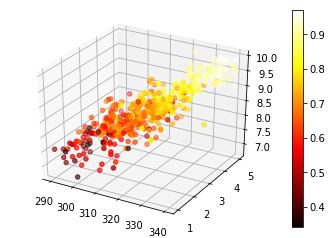

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(eh, dun, su, c=hariu, cmap=plt.hot())
fig.colorbar(img)
plt.show()

In [11]:
Y_pred=[]
for i in range(len(eh)):    
    Y_pred+=[(a*eh[i]+b*dun[i]+c*su[i]+d)*r+ (e*eh[i]+f*dun[i]+g*su[i]+h)*j+k]

## Predict hiisen hariug

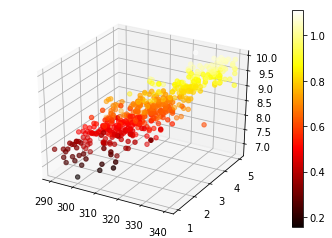

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
img = ax1.scatter(eh, dun, su, c=Y_pred, cmap=plt.hot())
fig.colorbar(img)
plt.show()

In [13]:
Y_pred[:10]

[0.8788379284841318,
 0.804081933761129,
 0.5565351426674218,
 0.6441523714726604,
 0.4668537398115441,
 0.9921534498065278,
 0.5681537509075306,
 0.44091782172760274,
 0.3505083809909292,
 0.6276290259558409]